In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer

In [ ]:
heart_data = pd.read_csv('/content/drive/MyDrive/StatMod Project/heart_statlog_cleveland_hungary_final.csv')

In [ ]:
heart_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Pre-Processing and Cleaning**

In [ ]:
#Checking for nans
nan_presence = heart_data.isna()
print(nan_presence)

        age    sex  chest pain type  resting bp s  cholesterol  \
0     False  False            False         False        False   
1     False  False            False         False        False   
2     False  False            False         False        False   
3     False  False            False         False        False   
4     False  False            False         False        False   
...     ...    ...              ...           ...          ...   
1185  False  False            False         False        False   
1186  False  False            False         False        False   
1187  False  False            False         False        False   
1188  False  False            False         False        False   
1189  False  False            False         False        False   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                   False        False           False            False   
1                   False        False           False   

In [ ]:
nan_counts = heart_data.isna().sum()
print(nan_counts)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


**Two Visualizations**

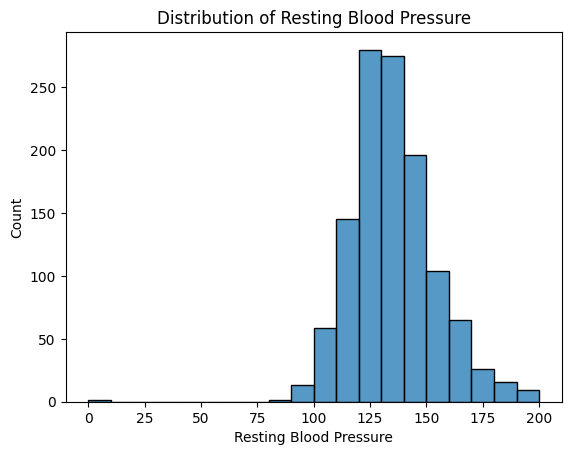

In [ ]:
#Histogram of the resting bp s distribution
sns.histplot(heart_data['resting bp s'], bins=20)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.title('Distribution of Resting Blood Pressure')
plt.show()

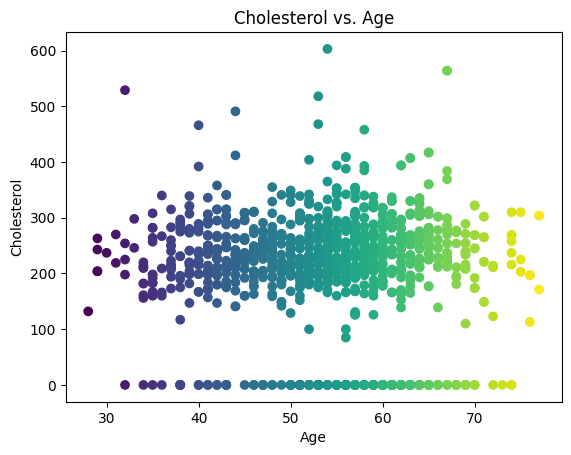

In [ ]:
#Scatterplot of Cholesterol vs. Age
plt.scatter(heart_data['age'], heart_data['cholesterol'], c=heart_data['age'])
plt.xlabel('Age')
plt.title('Cholesterol vs. Age')
_ = plt.ylabel('Cholesterol')

**Qualitative Prediction: Logistic Regression**

In [ ]:
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']

heart_data_encoded = pd.get_dummies(heart_data, columns=categorical_cols, drop_first=True)

X = heart_data_encoded.drop('target', axis=1)
y = heart_data_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy Score:', accuracy)

Accuracy Score: 0.8697478991596639


In [ ]:
print(conf_matrix)

[[ 89  18]
 [ 13 118]]


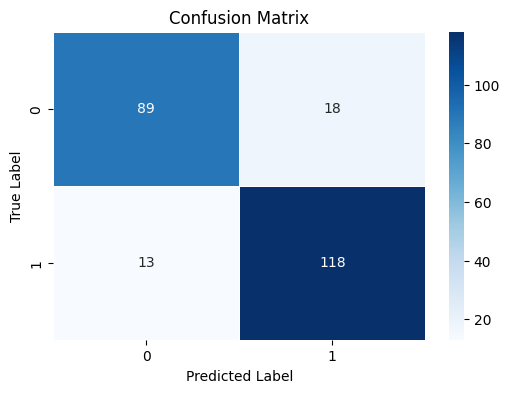

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

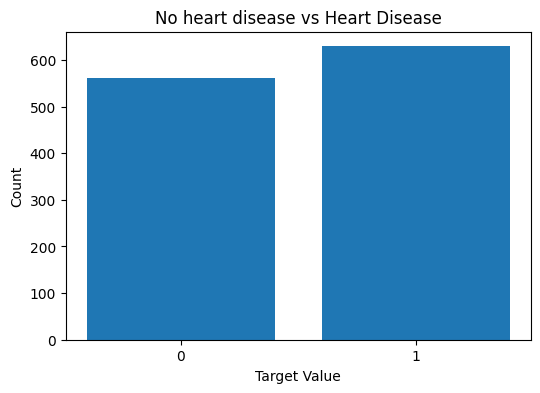

In [ ]:
#Distribution of Target Values
target=y
target_counts = target.value_counts()

plt.figure(figsize=(6,4))
plt.bar(target_counts.index, target_counts.values, tick_label=target_counts.index)
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(ticks=target_counts.index)
plt.title('No heart disease vs Heart Disease')
plt.show()

In [ ]:
#Determining useful predictors using odds ratio
coefficients = pd.DataFrame(logistic_model.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients)

                       Coefficient  Odds_Ratio
age                       0.236065    1.266257
resting bp s              0.061993    1.063955
cholesterol              -0.290257    0.748071
max heart rate           -0.180168    0.835130
oldpeak                   0.393112    1.481584
sex_1                     0.592222    1.808001
chest pain type_2        -0.070744    0.931700
chest pain type_3         0.055249    1.056804
chest pain type_4         0.832956    2.300107
fasting blood sugar_1     0.375152    1.455213
resting ecg_1            -0.057374    0.944241
resting ecg_2             0.054097    1.055587
exercise angina_1         0.402099    1.494959
ST slope_1               -0.761046    0.467178
ST slope_2                0.227433    1.255373
ST slope_3               -0.166770    0.846394


In [ ]:
#useful predictors are chest pain type, ST slope, sex, exercise angina, and oldpeak

**Quantitative Prediction: Decision Tree**

Mean Squared Error: 574.719537815126
R² Score: 0.16684608824823866


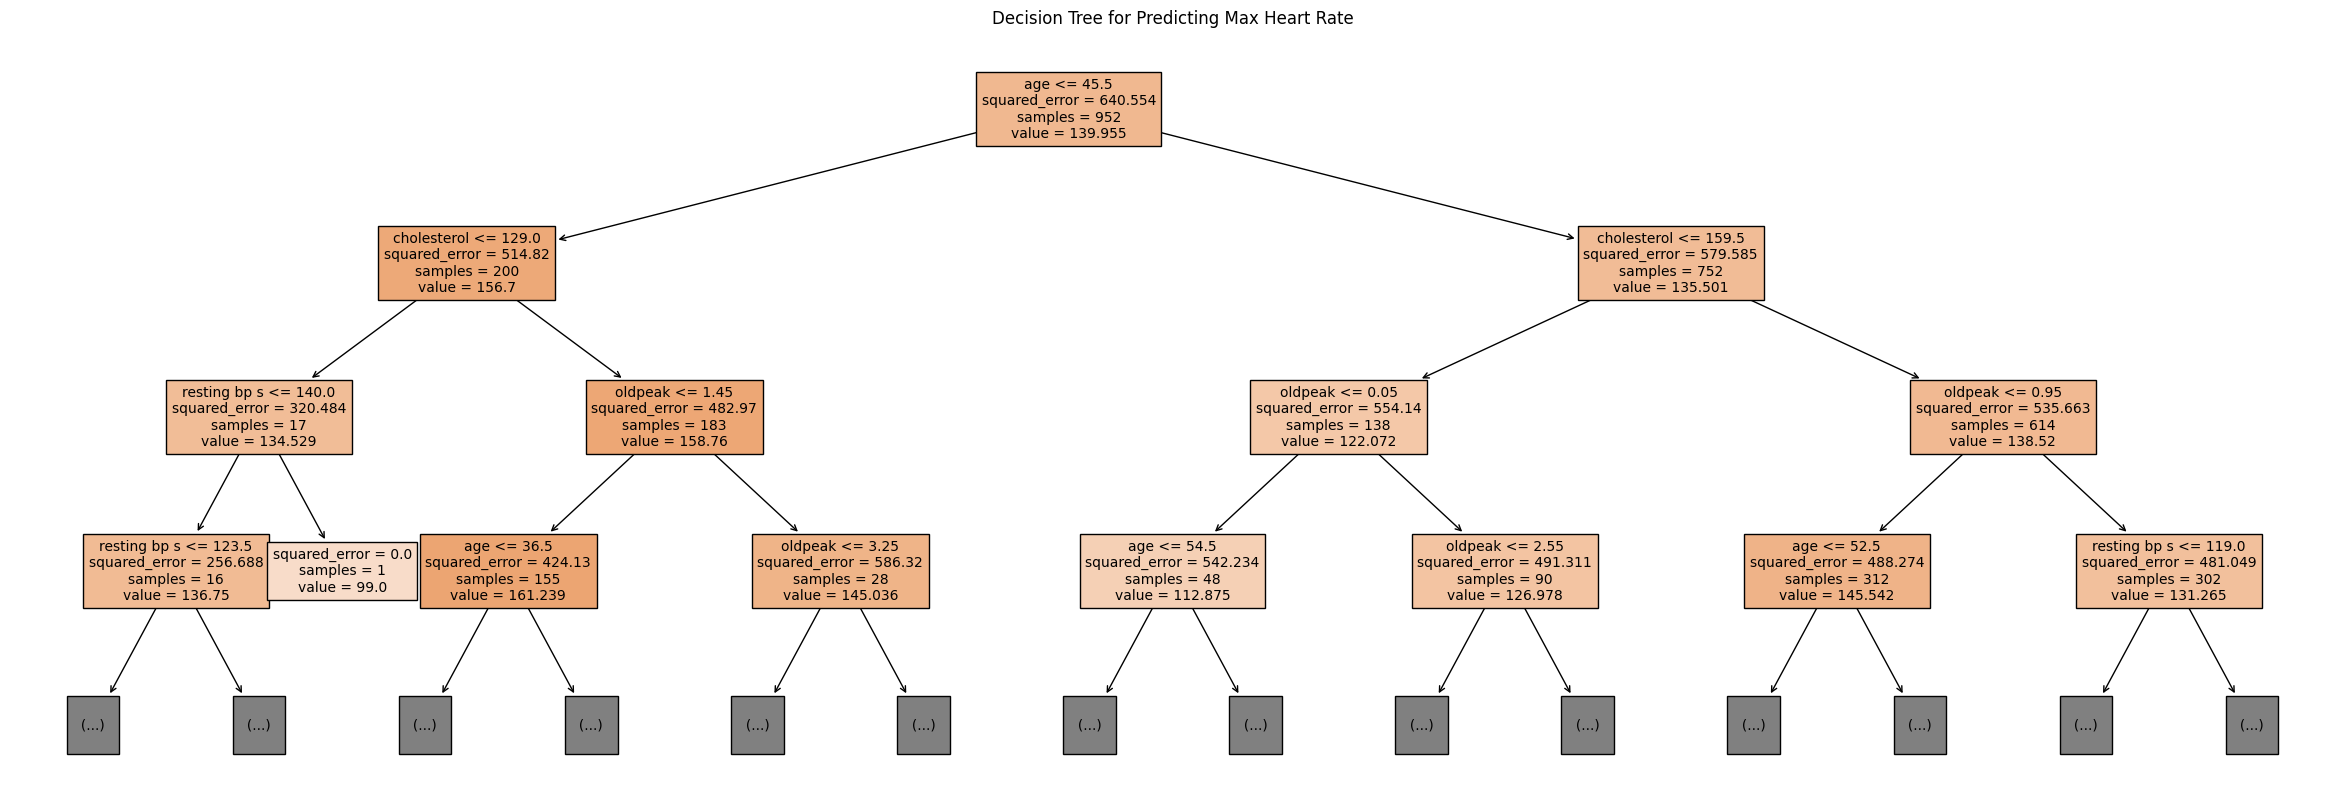

In [ ]:
#predicting the max heart rate based on the features age, resting bp s, cholesterol, and oldpeak
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

quantitative_cols = ['age', 'resting bp s', 'cholesterol', 'oldpeak']
X = heart_data[quantitative_cols]
y = heart_data['max heart rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(30, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.title('Decision Tree for Predicting Max Heart Rate')
plt.show()


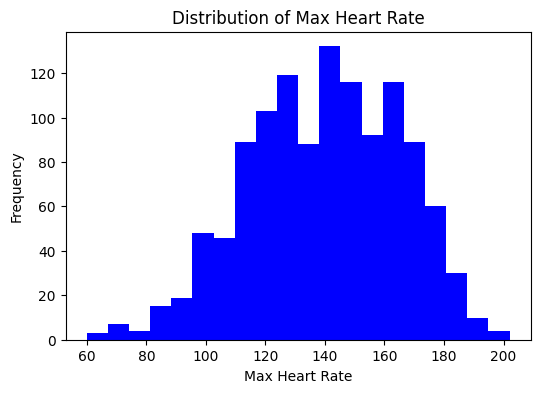

In [ ]:
#Histogram of distribution of max heart rate
plt.figure(figsize=(6, 4))
plt.hist(heart_data['max heart rate'], bins=20, color='blue')
plt.title('Distribution of Max Heart Rate')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

**Tuning and Validation**

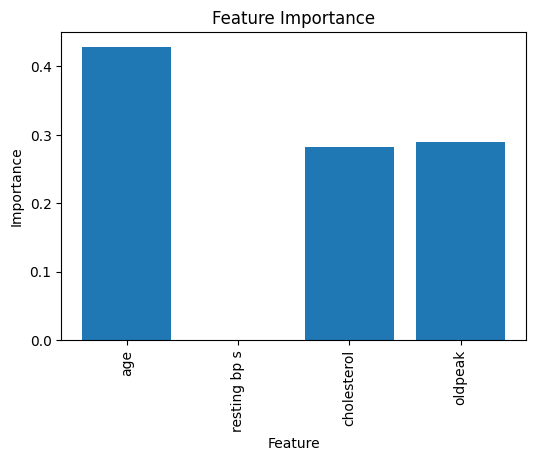

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE

tree_regressor = DecisionTreeRegressor(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_mse = cross_val_score(tree_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_mse = -cv_mse
mean_mse = np.mean(cv_mse)
std_mse = np.std(cv_mse)

#Feature selection
rfe = RFE(estimator=tree_regressor, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

#Hyperparameter tuning
param_grid = {'max_depth': range(1, 20)}
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)
grid_search.fit(X, y)

#Best model and parameters
best_tree_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_

#Plot of feature importance
plt.figure(figsize=(6, 4))
plt.title('Feature Importance')
plt.bar(range(len(best_tree_regressor.feature_importances_)), best_tree_regressor.feature_importances_)
plt.xticks(range(len(best_tree_regressor.feature_importances_)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

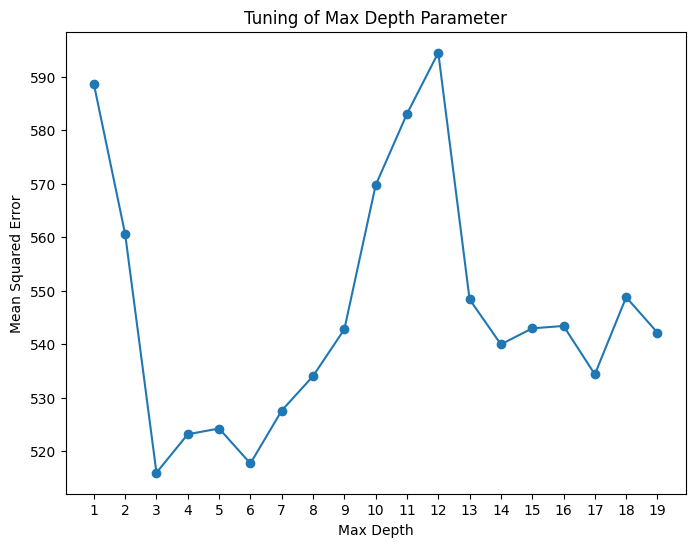

Mean MSE from Cross-Validation: 566.5793650793651
Selected Features: Index(['age', 'resting bp s', 'cholesterol', 'oldpeak'], dtype='object')
Best Max Depth: 3


In [ ]:
#Plot of the results of the hyperparameter tuning
max_depth_values = param_grid['max_depth']
mean_test_scores = -grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, mean_test_scores, marker='o')
plt.title('Tuning of Max Depth Parameter')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.xticks(max_depth_values)
plt.show()

#cross-validation results and best parameters
print(f"Mean MSE from Cross-Validation: {mean_mse}")
print(f"Selected Features: {selected_features}")
print(f"Best Max Depth: {best_params['max_depth']}")

In [ ]:
#max depth of 3 has the lowest mean squared error.